In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
df_DS = df[df['job_title_short']=='Data Scientist'].copy()
df_DS.dropna(subset='salary_hour_avg')

df_DS['salary_hour_avg'].plot(kind='hist',bins=40,color='blue',edgecolor='black')

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')

plt.show()

In [ ]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)
# df_skills.head()
# Plot the histogram
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')

plt.show()

In [ ]:
df_skills = df.dropna(subset=['job_skills'])
df_skills_exp = df_skills.explode('job_skills')
count = df_skills_exp['job_skills'].value_counts(ascending=False) 

count.plot(kind='hist',bins=55,color='magenta',edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')

plt.show()


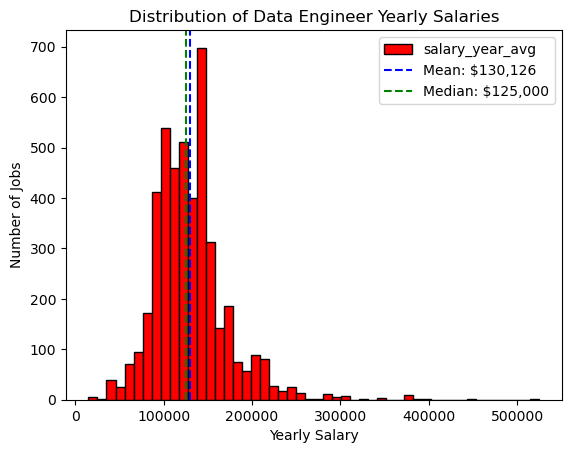

In [43]:
df_DE = df[df['job_title_short']=='Data Engineer'].copy()
df_DE = df_DE.dropna(subset='salary_year_avg')

salary_mean = df_DE['salary_year_avg'].mean()
salary_median = df_DE['salary_year_avg'].median()
# salary_mean,salary_median

df_DE['salary_year_avg'].plot(kind='hist',bins=50,color='red',edgecolor='black')
plt.axvline(salary_mean,color='blue',linestyle='dashed',label=f'Mean: ${salary_mean:,.0f}')
plt.axvline(salary_median,color='green',linestyle='dashed',label=f'Median: ${salary_median:,.0f}')

plt.legend()
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')

plt.show()

In [ ]:
Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
Customize the plot by setting the number of bins to 50, the bar color to red
Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
color: 'blue'/'green'
linestyle: 'dashed'
label: e.g., f'Mean: ${mean_salary:,.0f}'
Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

Hint:
Use the DataFrames plot() method and set the bins parameter to 50 and the color parameter to 'red'. Use plt.axvline() 
to add annotations for the mean and median salaries.